#**Prostate Cancer Model**

###Group Members:



1.   Abhay Singh 2205957
2.   Aman Krishan 22051314
3.   Aman Sidana 22051315
4.   Munal Gogoi 22051527






Determine whether the given data indicates the presence of prostate cancer and classify it as malignant or benign.



###**Problem Statement:**  

Prostate cancer is one of the most prevalent cancers among men, making early and accurate diagnosis crucial for effective treatment. This study aims to develop a machine learning model to predict the presence of prostate cancer and classify it as malignant or benign based on clinical and diagnostic data.  

The objective is to train and evaluate multiple machine learning models, comparing their performance in terms of accuracy, precision, recall, and other relevant metrics. By analyzing different algorithms, including traditional classifiers (e.g., Logistic Regression, Decision Trees, Support Vector Machines) and advanced models (e.g., Random Forest, Gradient Boosting, Neural Networks), the study seeks to identify the most effective approach for prostate cancer prediction.  

This project will provide insights into the most suitable machine learning techniques for prostate cancer diagnosis, potentially aiding in early detection and improved patient outcomes.

## Data Loading

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Prostate_Cancer.csv to Prostate_Cancer.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Prostate_Cancer.csv']))
print(df.head())


   id diagnosis_result  radius  texture  perimeter  area  smoothness  \
0   1                M      23       12        151   954       0.143   
1   2                B       9       13        133  1326       0.143   
2   3                M      21       27        130  1203       0.125   
3   4                M      14       16         78   386       0.070   
4   5                M       9       19        135  1297       0.141   

   compactness  symmetry  fractal_dimension  
0        0.278     0.242              0.079  
1        0.079     0.181              0.057  
2        0.160     0.207              0.060  
3        0.284     0.260              0.097  
4        0.133     0.181              0.059  


## **Data preparation & Data Preprocessing**

### Data separation as X and y

In [ ]:
y = df['diagnosis_result']
y

,diagnosis_result
0,M
1,B
2,M
3,M
4,M
...,...
95,M
96,B
97,B
98,B


In [ ]:
X = df.drop(['diagnosis_result','id'], axis=1)
X

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056
96,22,14,78,451,0.105,0.071,0.190,0.066
97,19,27,62,295,0.102,0.053,0.135,0.069
98,21,24,74,413,0.090,0.075,0.162,0.066


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


## **Model Development**

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# k=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

# predictions on the validation set
y_pred_val = knn.predict(X_val)

# Evaluate the model's accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {accuracy_val}")

# Make predictions on the test set
y_pred_test = knn.predict(X_test)

# Evaluate the model's accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy_test}")


Validation Accuracy: 0.8333333333333334
Test Accuracy: 0.8


### Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score, precision_score, recall_score


# predictions on the test set
y_pred_test = knn.predict(X_test)
y_prob_test = knn.predict_proba(X_test)[:, 1]

# evaluation metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, pos_label='M')
recall = recall_score(y_test, y_pred_test, pos_label='M')

# AUC and AUPR
y_test_binary = (y_test == 'M').astype(int)
auc_roc = roc_auc_score(y_test_binary, y_prob_test)
aupr = average_precision_score(y_test_binary, y_prob_test)

results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'AUC-ROC', 'AUPR', 'True Positive', 'True Negative', 'False Positive', 'False Negative'],
    'Value': [accuracy, precision, recall, auc_roc, aupr, tp, tn, fp, fn]
})

print(results_df)

           Metric      Value
0        Accuracy   0.800000
1       Precision   0.900000
2          Recall   0.818182
3         AUC-ROC   0.806818
4            AUPR   0.886690
5   True Positive  18.000000
6   True Negative   6.000000
7  False Positive   2.000000
8  False Negative   4.000000


### ROC Curve

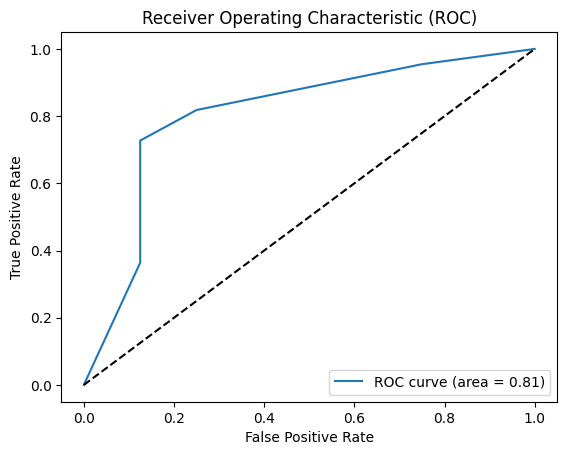

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_test)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
# precision_curve, recall_curve, _ = precision_recall_curve(y_test_binary, y_prob_test)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000)

# Training on the training data
logistic_regression.fit(X_train, y_train)

# predictions on the validation set
y_pred_val = logistic_regression.predict(X_val)

# accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {accuracy_val}")

# predictions on the test set
y_pred_test = knn.predict(X_test)

# accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy_test}")

Validation Accuracy: 0.8888888888888888
Test Accuracy: 0.8


### Model Evaluation

In [ ]:
# predictions on the test set
y_pred_test = logistic_regression.predict(X_test)
y_prob_test = logistic_regression.predict_proba(X_test)[:, 1]

# evaluation metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
accuracy = accuracy_score(y_test, y_pred_test)

precision = precision_score(y_test, y_pred_test, pos_label='M')
recall = recall_score(y_test, y_pred_test, pos_label='M')

# AUC and AUPR
y_test_binary = (y_test == 'M').astype(int)
auc_roc = roc_auc_score(y_test_binary, y_prob_test)
aupr = average_precision_score(y_test_binary, y_prob_test)

results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'AUC-ROC', 'AUPR', 'True Positive', 'True Negative', 'False Positive', 'False Negative'],
    'Value': [accuracy, precision, recall, auc_roc, aupr, tp, tn, fp, fn]
})



print(results_df)

           Metric      Value
0        Accuracy   0.800000
1       Precision   0.863636
2          Recall   0.863636
3         AUC-ROC   0.818182
4            AUPR   0.891980
5   True Positive  19.000000
6   True Negative   5.000000
7  False Positive   3.000000
8  False Negative   3.000000


### ROC Curve

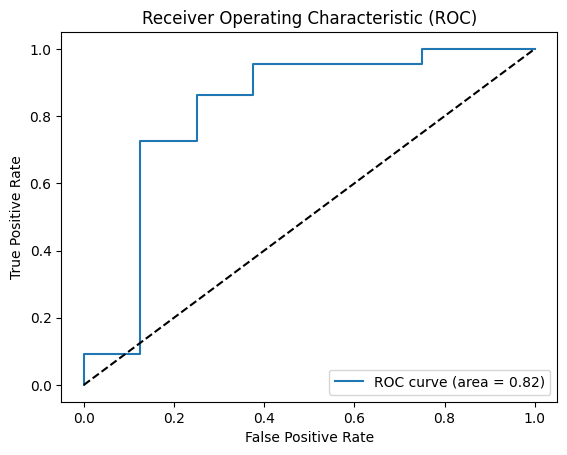

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_test)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
# precision_curve, recall_curve, _ = precision_recall_curve(y_test_binary, y_prob_test)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model on the training data
rf.fit(X_train, y_train)

# predictions on the validation set
y_pred_val_rf = rf.predict(X_val)

# accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy (Random Forest): {accuracy_val}")

# predictions on the test set
y_pred_test_rf = rf.predict(X_test)

# accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy (Random Forest): {accuracy_test}")


Validation Accuracy (Random Forest): 0.8888888888888888
Test Accuracy (Random Forest): 0.8


### Model Evaluation

In [ ]:
y_pred_test_rf = rf.predict(X_test)
y_prob_test_rf = rf.predict_proba(X_test)[:, 1]

# evaluation metrics
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, y_pred_test_rf).ravel()
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
precision_rf = precision_score(y_test, y_pred_test_rf, pos_label='M')
recall_rf = recall_score(y_test, y_pred_test_rf, pos_label='M')
auc_roc_rf = roc_auc_score(y_test_binary, y_prob_test_rf)
aupr_rf = average_precision_score(y_test_binary, y_prob_test_rf)


results_rf_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'AUC-ROC', 'AUPR', 'True Positive', 'True Negative', 'False Positive', 'False Negative'],
    'Value': [accuracy_rf, precision_rf, recall_rf, auc_roc_rf, aupr_rf, tp_rf, tn_rf, fp_rf, fn_rf]
})

print("\nRandom Forest Results:")
print(results_rf_df)


Random Forest Results:
           Metric      Value
0        Accuracy   0.800000
1       Precision   0.863636
2          Recall   0.863636
3         AUC-ROC   0.812500
4            AUPR   0.913870
5   True Positive  19.000000
6   True Negative   5.000000
7  False Positive   3.000000
8  False Negative   3.000000


### Roc Curve

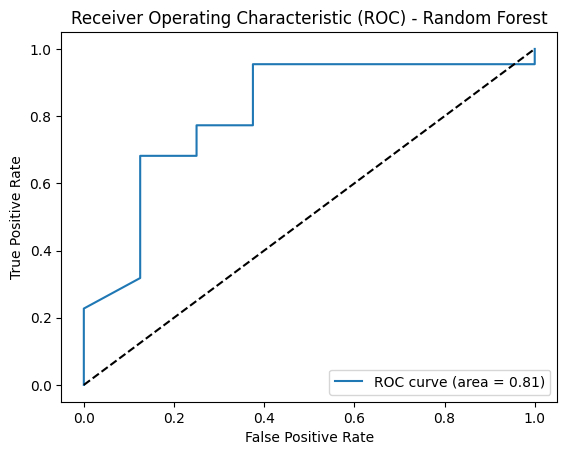

In [ ]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_binary, y_prob_test_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
# precision_curve_rf, recall_curve_rf, _ = precision_recall_curve(y_test_binary, y_prob_test_rf)


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Training the model on the training data
gb.fit(X_train, y_train)

# predictions on the validation set
y_pred_val_gb = gb.predict(X_val)

# accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy (Gradient Boosting): {accuracy_val}")

# predictions on the test set
y_pred_test_gb = gb.predict(X_test)

# model's accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy (Gradient Boosting): {accuracy_test}")


Validation Accuracy (Gradient Boosting): 0.8888888888888888
Test Accuracy (Gradient Boosting): 0.8


### Model Evaluation

In [ ]:
# predictions on the test set for Gradient Boosting
y_pred_test_gb = gb.predict(X_test)
y_prob_test_gb = gb.predict_proba(X_test)[:, 1]

# evaluation metrics
tn_gb, fp_gb, fn_gb, tp_gb = confusion_matrix(y_test, y_pred_test_gb).ravel()
accuracy_gb = accuracy_score(y_test, y_pred_test_gb)
precision_gb = precision_score(y_test, y_pred_test_gb, pos_label='M')
recall_gb = recall_score(y_test, y_pred_test_gb, pos_label='M')
auc_roc_gb = roc_auc_score(y_test_binary, y_prob_test_gb)
aupr_gb = average_precision_score(y_test_binary, y_prob_test_gb)

results_gb_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'AUC-ROC', 'AUPR', 'True Positive', 'True Negative', 'False Positive', 'False Negative'],
    'Value': [accuracy_gb, precision_gb, recall_gb, auc_roc_gb, aupr_gb, tp_gb, tn_gb, fp_gb, fn_gb]
})

print("\nGradient Boosting Results:")
print(results_gb_df)


Gradient Boosting Results:
           Metric      Value
0        Accuracy   0.766667
1       Precision   0.857143
2          Recall   0.818182
3         AUC-ROC   0.744318
4            AUPR   0.863954
5   True Positive  18.000000
6   True Negative   5.000000
7  False Positive   3.000000
8  False Negative   4.000000


### ROC Curve

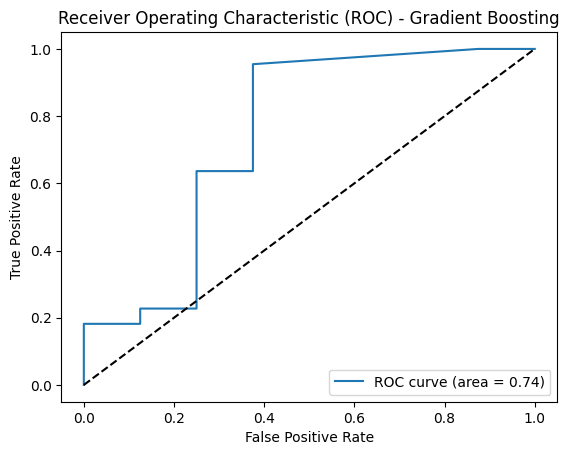

In [ ]:
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test_binary, y_prob_test_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.plot(fpr_gb, tpr_gb, label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
# precision_curve_gb, recall_curve_gb, _ = precision_recall_curve(y_test_binary, y_prob_test_gb)

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the target variable to numerical values
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


In [ ]:
# XGBoost Model Evaluation
y_prob_test_xgb = model.predict_proba(X_test)[:, 1]

# evaluation metrics
tn_xgb, fp_xgb, fn_xgb, tp_xgb = confusion_matrix(y_test, y_pred).ravel()
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
auc_roc_xgb = roc_auc_score(y_test, y_prob_test_xgb)
aupr_xgb = average_precision_score(y_test, y_prob_test_xgb)

results_xgb_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'AUC-ROC', 'AUPR', 'True Positive', 'True Negative', 'False Positive', 'False Negative'],
    'Value': [accuracy_xgb, precision_xgb, recall_xgb, auc_roc_xgb, aupr_xgb, tp_xgb, tn_xgb, fp_xgb, fn_xgb]
})

print("\nXGBoost Results:")
results_xgb_df



XGBoost Results:


,Metric,Value
0,Accuracy,0.833333
1,Precision,0.904762
2,Recall,0.863636
3,AUC-ROC,0.835227
4,AUPR,0.895686
5,True Positive,19.000000
6,True Negative,6.000000
7,False Positive,2.000000
8,False Negative,3.000000


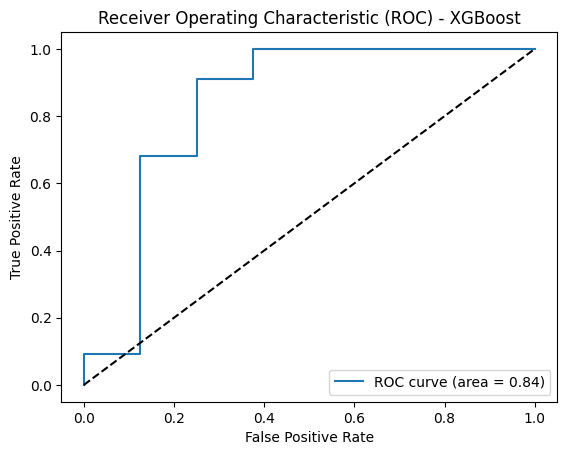

In [ ]:
# XGBoost ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_test_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.plot(fpr_xgb, tpr_xgb, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - XGBoost')
plt.legend(loc="lower right")
plt.show()


# Model Colab


## Voting

In [ ]:
# prompt: implementsoft voting of dataset df

import numpy as np
from scipy.stats import mode

def soft_voting(models, X_test):

  # Get predicted probabilities for each model
  predicted_probabilities = [model.predict_proba(X_test) for model in models]

  # Average the probabilities across models
  average_probabilities = np.mean(predicted_probabilities, axis=0)

  # Predict the class with the highest average probability
  predicted_classes = np.argmax(average_probabilities, axis=1)

  # Convert numerical predictions back to original class labels if needed
  if isinstance(y_test[0],str):
    predicted_classes = le.inverse_transform(predicted_classes)

  return predicted_classes


# Example usage (assuming you have trained models knn, logistic_regression, rf, gb, and model)
models = [knn, logistic_regression, rf, gb, model]
y_pred_voting = soft_voting(models, X_test)

# Evaluate the soft voting results
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Accuracy of Soft Voting: {accuracy_voting}")


Accuracy of Soft Voting: 0.8333333333333334


Accuracy of Soft Voting: 0.8333333333333334
Confusion Matrix:
[[ 5  3]
 [ 2 20]]
Precision of Soft Voting: 0.8695652173913043
Recall of Soft Voting: 0.9090909090909091
AUC of Soft Voting: 0.7840909090909092
AUPR of Soft Voting: 0.8661926643768697


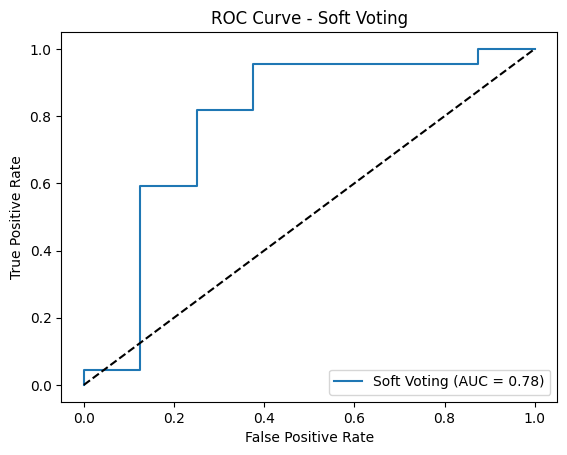

In [ ]:
# prompt: Calculate accuracy, precision, recall, confusion matrix, auc, aupr, roc curve for voting

# Assuming you have already trained the models (knn, logistic_regression, rf, gb, model) and have y_test and X_test
# ... (your existing code for model training) ...


def soft_voting(models, X_test):
    predicted_probabilities = [model.predict_proba(X_test) for model in models]
    average_probabilities = np.mean(predicted_probabilities, axis=0)
    predicted_classes = np.argmax(average_probabilities, axis=1)

    if isinstance(y_test[0], str):
        predicted_classes = le.inverse_transform(predicted_classes)
    return predicted_classes

models = [knn, logistic_regression, rf, gb, model]
y_pred_voting = soft_voting(models, X_test)

# Convert y_test to numerical labels for calculations if it's categorical.
if isinstance(y_test[0], str):
    y_test_numeric = le.transform(y_test)
else:
    y_test_numeric = y_test

# Evaluate the soft voting results
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Accuracy of Soft Voting: {accuracy_voting}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_voting)
print(f"Confusion Matrix:\n{cm}")

# Precision and Recall
precision_voting = precision_score(y_test, y_pred_voting, pos_label='M' if isinstance(y_test[0], str) else 1)  # Adjust pos_label as needed
recall_voting = recall_score(y_test, y_pred_voting, pos_label='M' if isinstance(y_test[0], str) else 1) # Adjust pos_label as needed
print(f"Precision of Soft Voting: {precision_voting}")
print(f"Recall of Soft Voting: {recall_voting}")

# AUC and AUPR
try:
    y_prob_voting = np.mean([model.predict_proba(X_test)[:, 1] for model in models], axis=0)  # Probabilities for the positive class
    auc_voting = roc_auc_score(y_test_numeric, y_prob_voting)  # Use numeric y_test
    aupr_voting = average_precision_score(y_test_numeric, y_prob_voting) # Use numeric y_test
    print(f"AUC of Soft Voting: {auc_voting}")
    print(f"AUPR of Soft Voting: {aupr_voting}")

    # ROC Curve
    fpr_voting, tpr_voting, _ = roc_curve(y_test_numeric, y_prob_voting)
    plt.plot(fpr_voting, tpr_voting, label=f"Soft Voting (AUC = {auc_voting:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Soft Voting")
    plt.legend(loc="lower right")
    plt.show()
except ValueError as e:
    print(f"Error calculating AUC/AUPR/ROC curve: {e}")
    print("Check if your data and model outputs are compatible.")


## Stacking

Accuracy of StackingClassifier: 0.8333333333333334

Stacking Results:
           Metric      Value
0        Accuracy   0.833333
1       Precision   0.869565
2          Recall   0.909091
3         AUC-ROC   0.801136
4            AUPR   0.885865
5   True Positive  20.000000
6   True Negative   5.000000
7  False Positive   3.000000
8  False Negative   2.000000


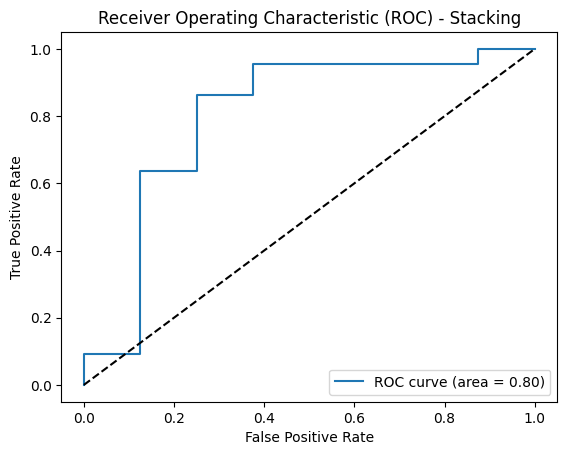

In [ ]:
from sklearn.ensemble import StackingClassifier

# Define the base estimators
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier())
]

# Define the meta-learner
meta_learner = LogisticRegression()

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_learner)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_model.predict(X_test)
y_prob_stacking = stacking_model.predict_proba(X_test)[:, 1]

# Evaluate the stacking model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy of StackingClassifier: {accuracy_stacking}")

#Further evaluation metrics can be added here similar to what's done for individual models
#e.g., confusion matrix, precision, recall, AUC-ROC, etc.
tn_stack, fp_stack, fn_stack, tp_stack = confusion_matrix(y_test, y_pred_stacking).ravel()
precision_stack = precision_score(y_test, y_pred_stacking)
recall_stack = recall_score(y_test, y_pred_stacking)
auc_roc_stack = roc_auc_score(y_test, y_prob_stacking)
aupr_stack = average_precision_score(y_test, y_prob_stacking)

results_stack_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'AUC-ROC', 'AUPR', 'True Positive', 'True Negative', 'False Positive', 'False Negative'],
    'Value': [accuracy_stacking, precision_stack, recall_stack, auc_roc_stack, aupr_stack, tp_stack, tn_stack, fp_stack, fn_stack]
})

print("\nStacking Results:")
print(results_stack_df)

# ROC Curve for Stacking
fpr_stack, tpr_stack, thresholds_stack = roc_curve(y_test, y_prob_stacking)
roc_auc_stack = auc(fpr_stack, tpr_stack)

plt.plot(fpr_stack, tpr_stack, label='ROC curve (area = %0.2f)' % roc_auc_stack)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Stacking')
plt.legend(loc="lower right")
plt.show()


## Prediction

In [ ]:
def predict_prostate_cancer():

  radius = float(input("Enter radius: "))
  texture = float(input("Enter texture: "))
  perimeter = float(input("Enter perimeter: "))
  area = float(input("Enter area: "))
  smoothness = float(input("Enter smoothness: "))
  compactness = float(input("Enter compactness: "))
  symmetry = float(input("Enter symmetry: "))
  fractal_dimension = float(input("Enter fractal_dimension: "))

  new_data = [[radius, texture, perimeter, area, smoothness, compactness, symmetry, fractal_dimension]]

  new_data = scaler.transform(new_data)

  prediction = gb.predict(new_data)[0]

  if prediction == "M":
    print("Prostate cancer is likely present.")
  else:
    print("Prostate cancer is likely not present.")

predict_prostate_cancer()
